## Part 3: Comparing Manual K2 vs bnstruct

In this section we **compare** the two learned structures on the same datasets (Asia, Child, Ruiz) using:

1. **Structural metrics**  
   - **Structural Hamming Distance** (SHD)  
   - **Edge counts**  
   - **Precision / Recall / F₁** (treating one network as “reference”)

2. **Statistical scores**  
   - **Log‐likelihood**  
   - **BDeu** (marginal likelihood under BD equivalent uniform prior)  
   - **BIC** and **AIC**  

We use the **bnlearn** package to compute all of these.

---

### Libraries & Data

In [1]:
#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
# Required packages
#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
source("bnstruct_objects.R")

Bioconductor version '3.20' requires R version '4.4'; use `version = '3.18'`
  with R version 4.3; see https://bioconductor.org/install

Bioconductor version '3.20' is out-of-date; the current release version '3.21'
  is available with R version '4.5'; see https://bioconductor.org/install


Caricamento pacchetto: 'BiocGenerics'


I seguenti oggetti sono mascherati da 'package:stats':

    IQR, mad, sd, var, xtabs


I seguenti oggetti sono mascherati da 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min



Caricamento pacchetto: 'igraph'


I seguenti oggetti sono mascherati da 'package:graph':

    degree, edges, intersection, u

PHASE 1: Building Undirected Network...
Calculating Mutual Information...
Building initial network...
PHASE 2: Achieving Complete Connectivity...
Achieving complete connectivity...
PHASE 3: Refining Graph Structure...
Found 0 triangles to refine...
PHASE 4-7: Assigning Orientations...
PHASE 4: Conditional independence tests...
Completing orientations...
Extracting topological order...


ERROR: Error in topo_sort(g, mode = "out"): argomento non utilizzato (mode = "out")


#### Import True Network Structures

In [ ]:
#BN structures from documentation.
ruiz.true.dag <- model2network("[x1][x2|x1][x3|x2]")
asia.true.dag <- bn.net(bnlearn::read.bif("asia/asia.bif"))
child.true.dag <- bn.net(bnlearn::read.bif("child/child.bif"))
sachs.true.dag <- bn.net(bnlearn::read.bif("sachs/sachs.bif"))

# plot(ruiz.true.dag, main = "Ruiz True DAG")
# plot(asia.true, main = "Asia True DAG")
# plot(child.true, main = "Child True DAG")
# plot(sachs.true, main = "Sachs (True DAG")

#### `BN` (bnstruct) to `bn` (bnlearn) object

In [ ]:
bnstruct_to_bnlearn <- function(bnstruct_net) {
  vars <- variables(bnstruct_net)
  adj  <- dag(bnstruct_net)
  bn   <- empty.graph(nodes=vars)
  for(i in seq_along(vars)) for(j in seq_along(vars))
    if(adj[i,j]==1) 
      bn <- set.arc(bn, from=vars[i], to=vars[j])
  bn
}

#### Align nodes names

In [ ]:
align_node_names <- function(bn_old, bn_new) {
  old_names <- nodes(bn_old)
  ref_names <- nodes(bn_new)
  new_names <- sapply(old_names, function(o) {
    idx1 <- which(tolower(substr(ref_names, 1, 1)) == tolower(substr(o, 1, 1)))
    if (length(idx1) == 1) return(ref_names[idx1])
    idx2 <- which(tolower(substr(ref_names, 1, 2)) == tolower(substr(o, 1, 2)))
    if (length(idx2) == 1) return(ref_names[idx2])
    idx3 <- match(tolower(o), tolower(ref_names))
    if (!is.na(idx3)) return(ref_names[idx3])
    o
  }, USE.NAMES = FALSE)
  if (length(new_names) != length(old_names)) {
  stop("Mismatch: new_names (", length(new_names),
        ") vs. old_names (", length(old_names), ")")
}
  nodes(bn_old) <- new_names
  new_names
  return(bn_old)
}

In [ ]:
ruiz_bs_bn <- bnstruct_to_bnlearn(ruiz_net_bs)
asia_bs_bn <- bnstruct_to_bnlearn(asia_net_bs)
child_bs_bn <- bnstruct_to_bnlearn(child_net_bs)
sachs_bs_bn <- bnstruct_to_bnlearn(sachs_net_bs)

In [ ]:
length(nodes(child.true.dag)) != length(nodes(child_bs_bn))

[1] FALSE

In [ ]:
old.names.nets <- list(asia.true.dag, child.true.dag)
new.names.nets <- list(asia_bs_bn,   child_bs_bn)

asia.true.dag.aligned <- align_node_names(
    old.names.nets[[1]], new.names.nets[[1]]
  )
child.true.dag.aligned <- align_node_names(
    old.names.nets[[2]], new.names.nets[[2]]
  )

## Comparison

### Charts

In [ ]:
graphviz.chart(ruiz.true.dag, type = "barchart", layout = "dot", draw.labels = TRUE,
grid = TRUE, scale = c(0.75, 1.1), col = "black", bg = "transparent",
text.col = "black", bar.col = "black", strip.bg = bg, main = NULL,
sub = NULL)

### Plots

### Ruiz

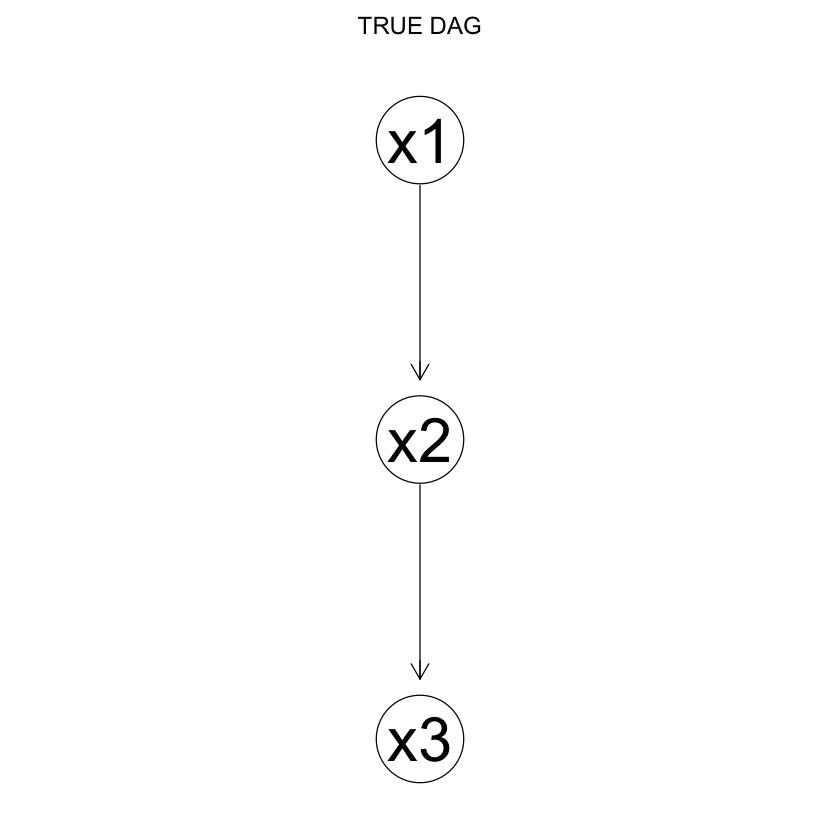

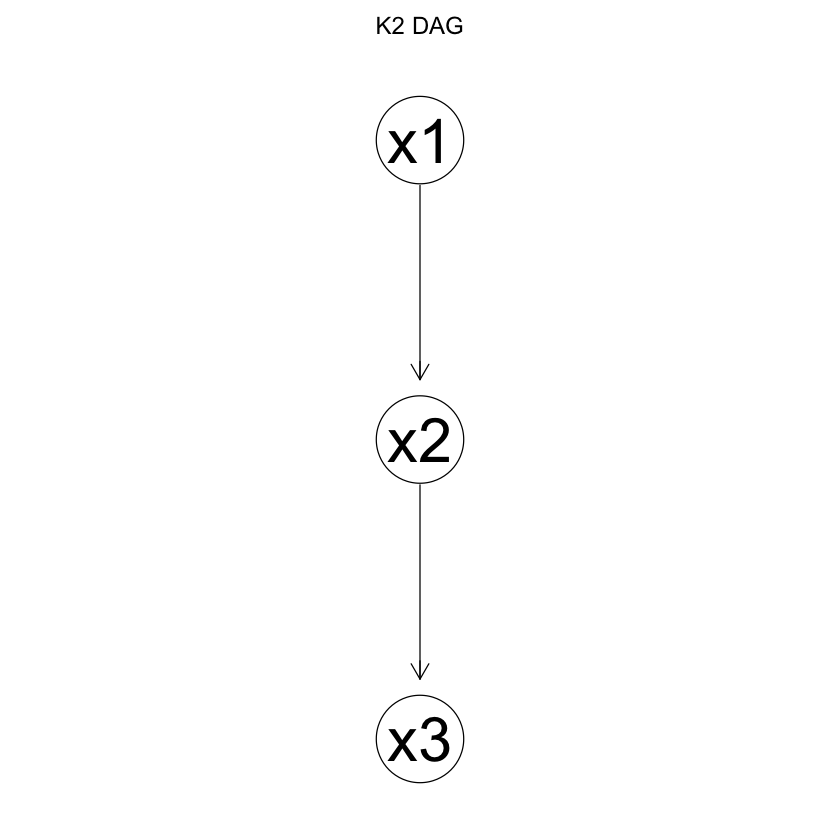

In [9]:
######## K2 ########
graphviz.compare(ruiz.true.dag, ruiz_net$dag, layout="dot", shape="circle", main = c("TRUE DAG", "K2 DAG"))

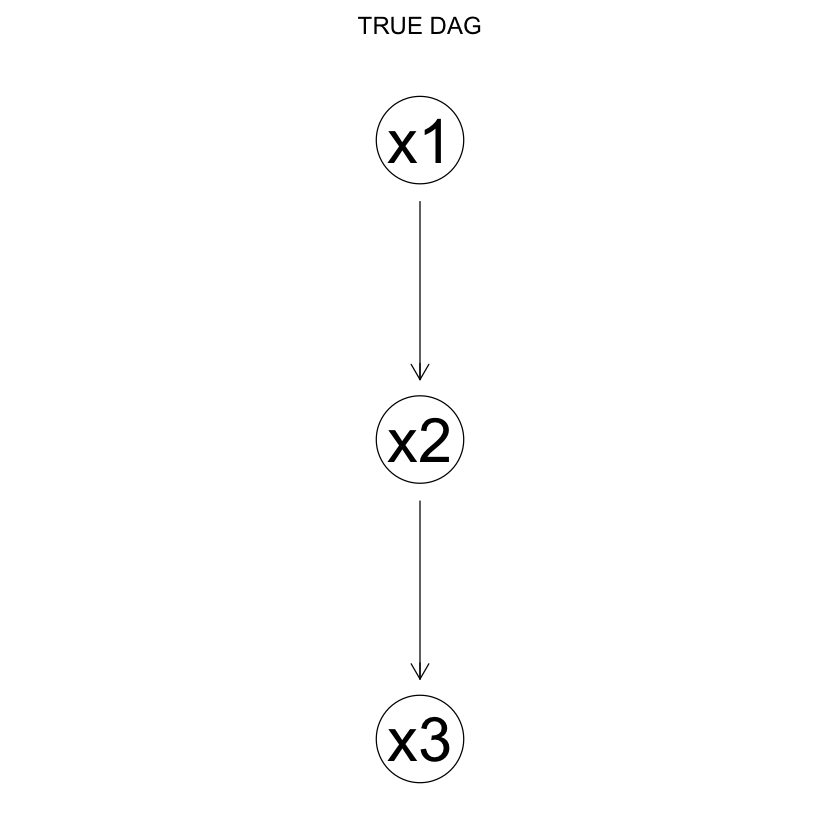

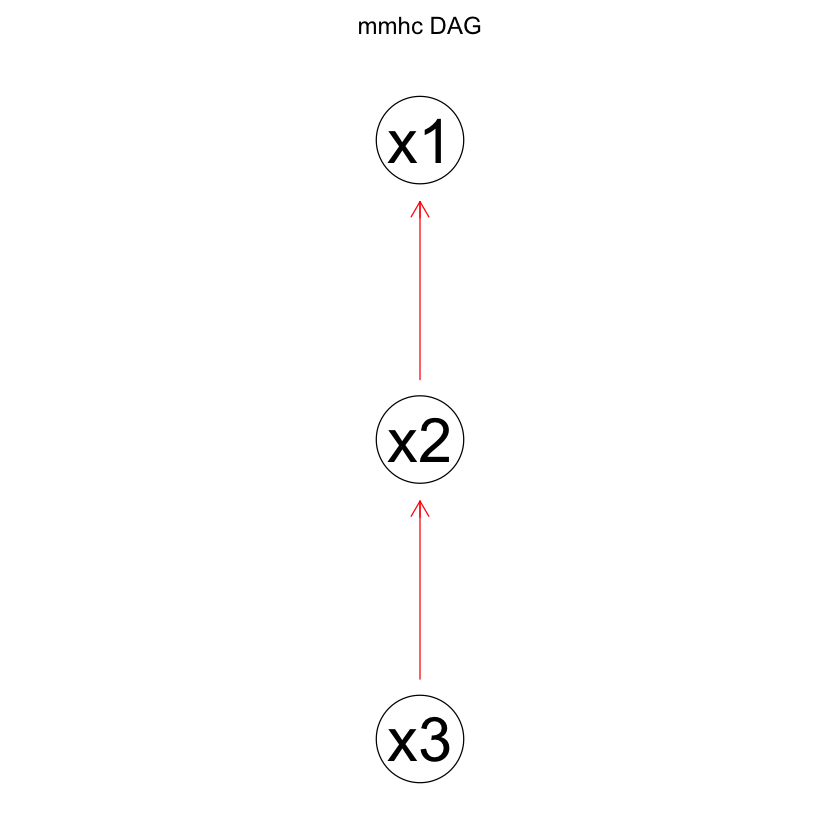

In [ ]:
######## bnstruct ########
graphviz.compare(ruiz.true.dag, ruiz_bs_bn, shape="circle", main = c("TRUE DAG", "MMHC DAG"))

### Asia

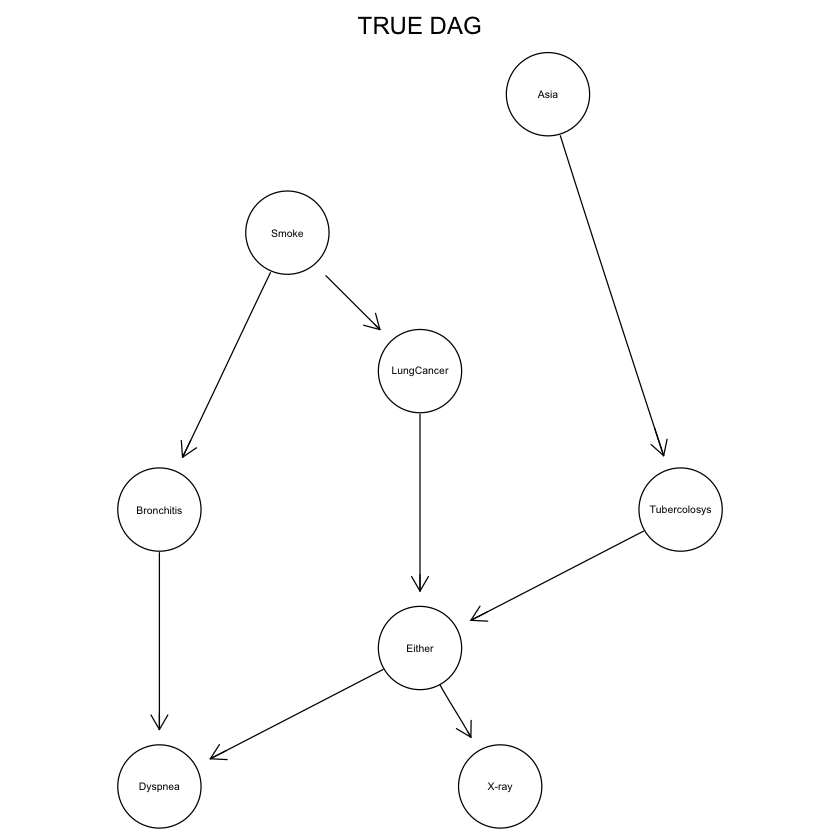

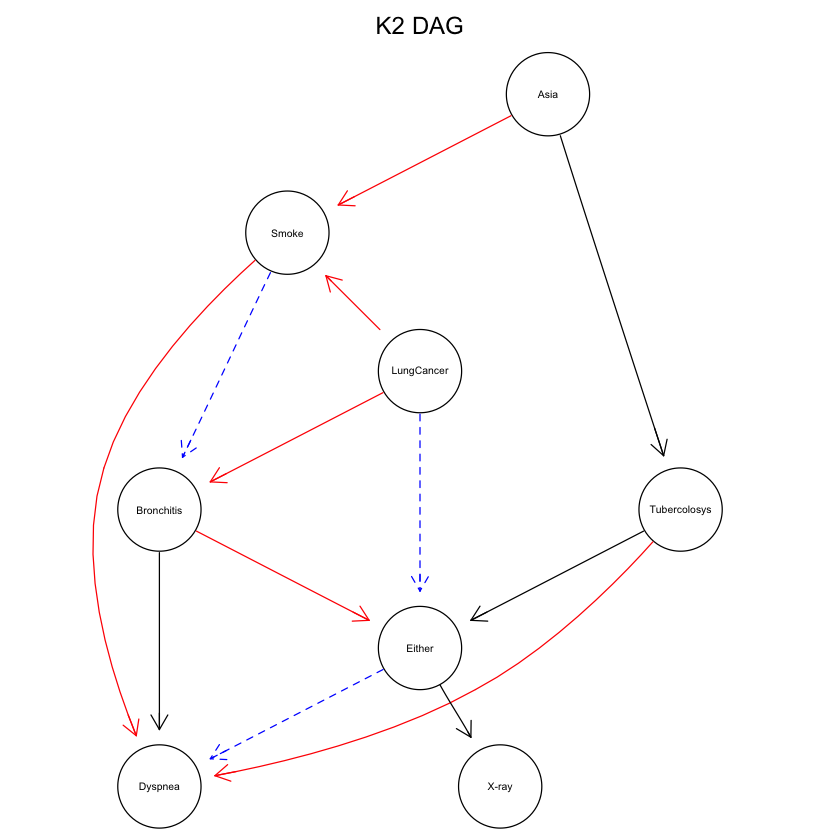

In [11]:
### K2 ####
graphviz.compare(asia.true.dag.aligned, asia_net$dag, layout="dot", shape="circle", main = c("TRUE DAG", "K2 DAG"))

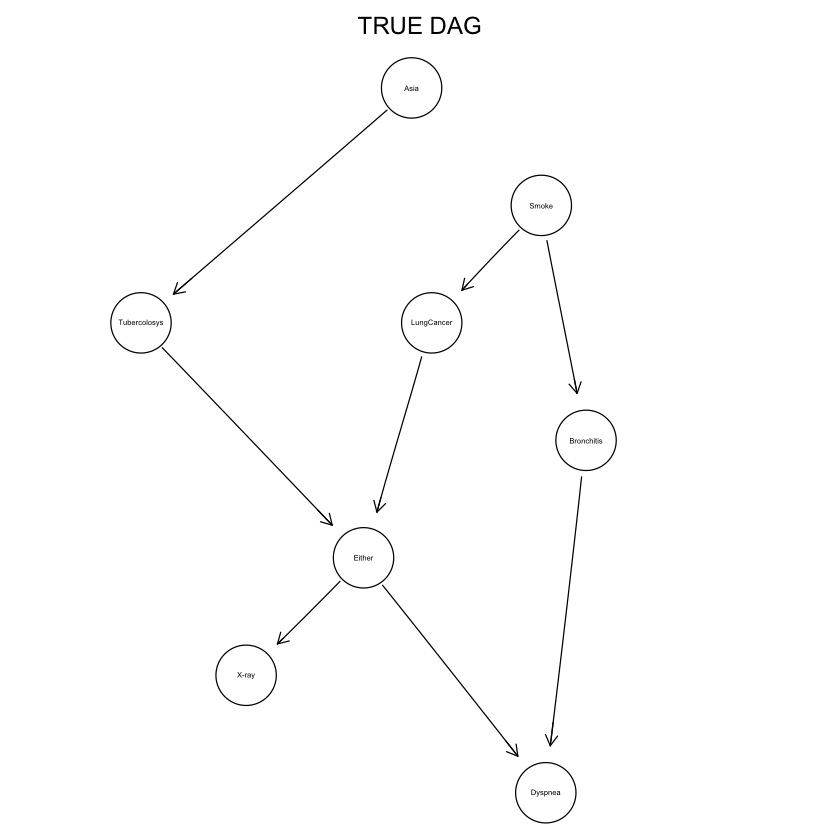

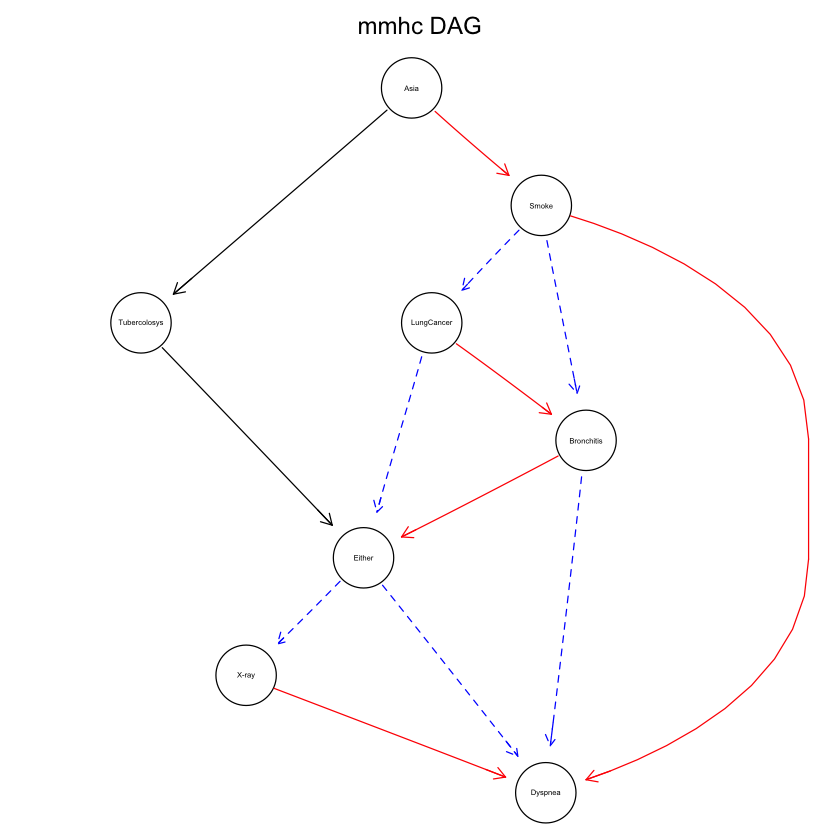

In [ ]:
### bnstruct ####
graphviz.compare(asia.true.dag.aligned, asia_bs_bn, shape="circle", main = c("TRUE DAG", "MMHC DAG"))

### Child

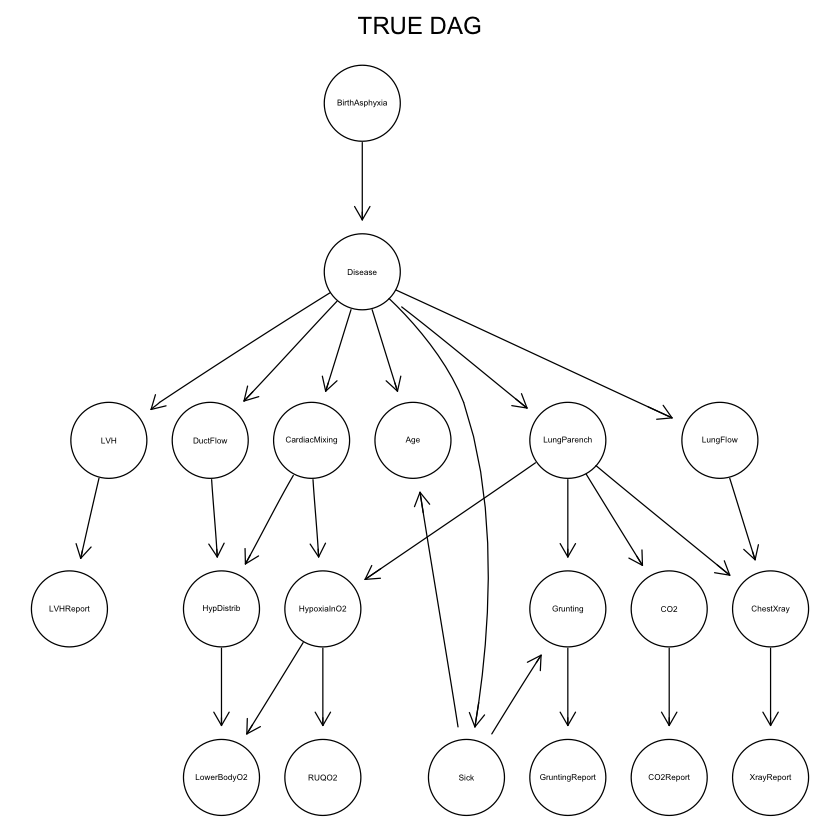

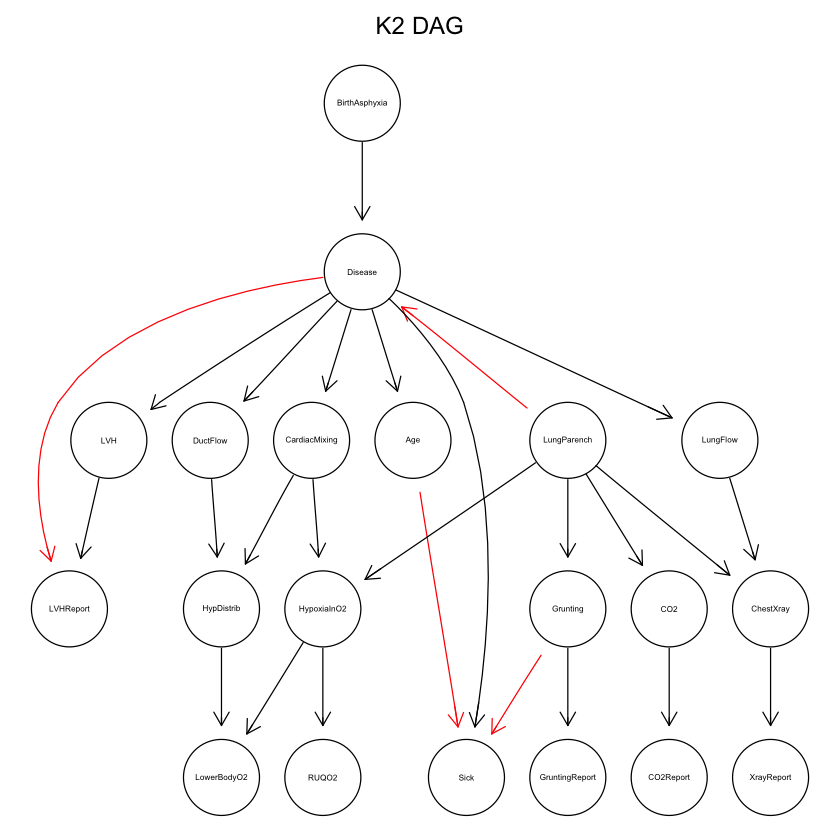

In [13]:
##### K2 #####
graphviz.compare(child.true.dag.aligned, child_net$dag, layout= "dot", shape="circle", main = c("TRUE DAG", "K2 DAG"))

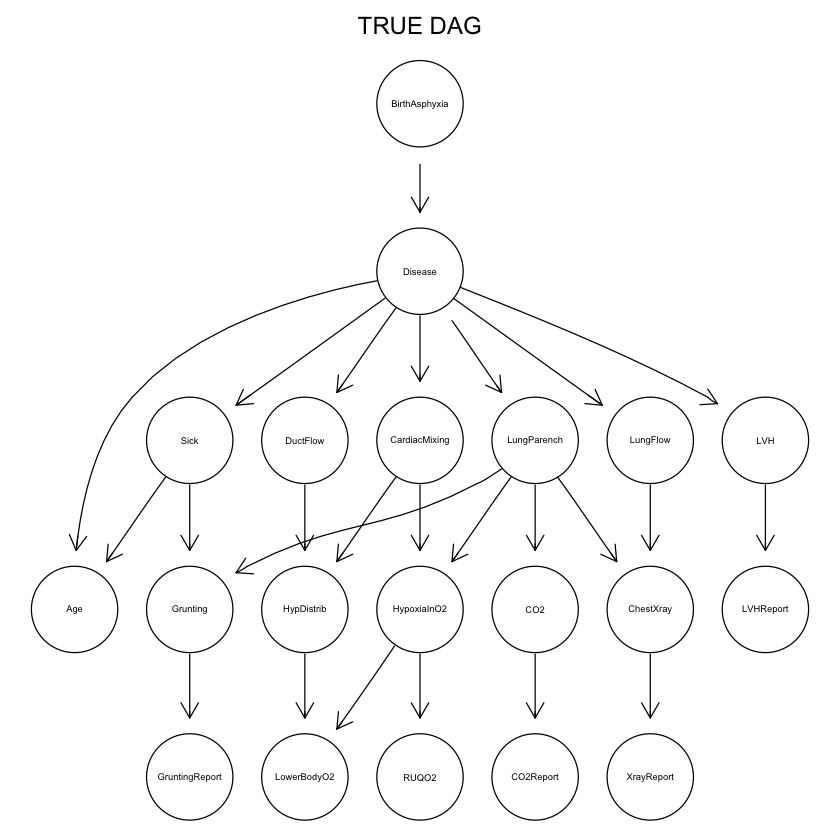

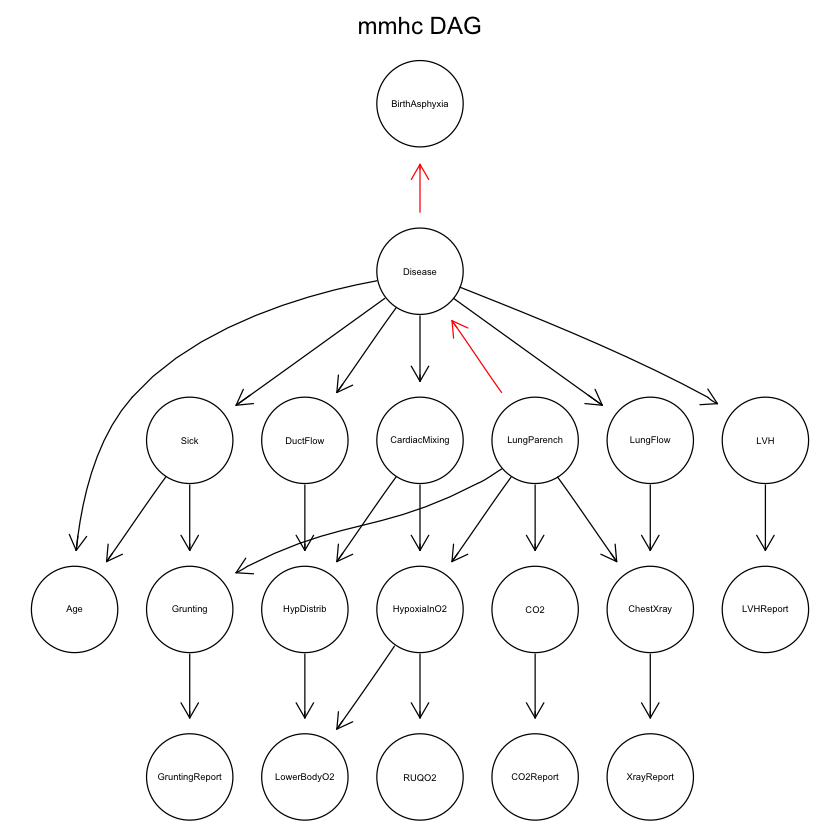

In [ ]:
##### bnstruct #####
graphviz.compare(child.true.dag.aligned, child_bs_bn, layout="dot", shape="circle", main = c("TRUE DAG", "MMHC DAG"))

#### SACHS

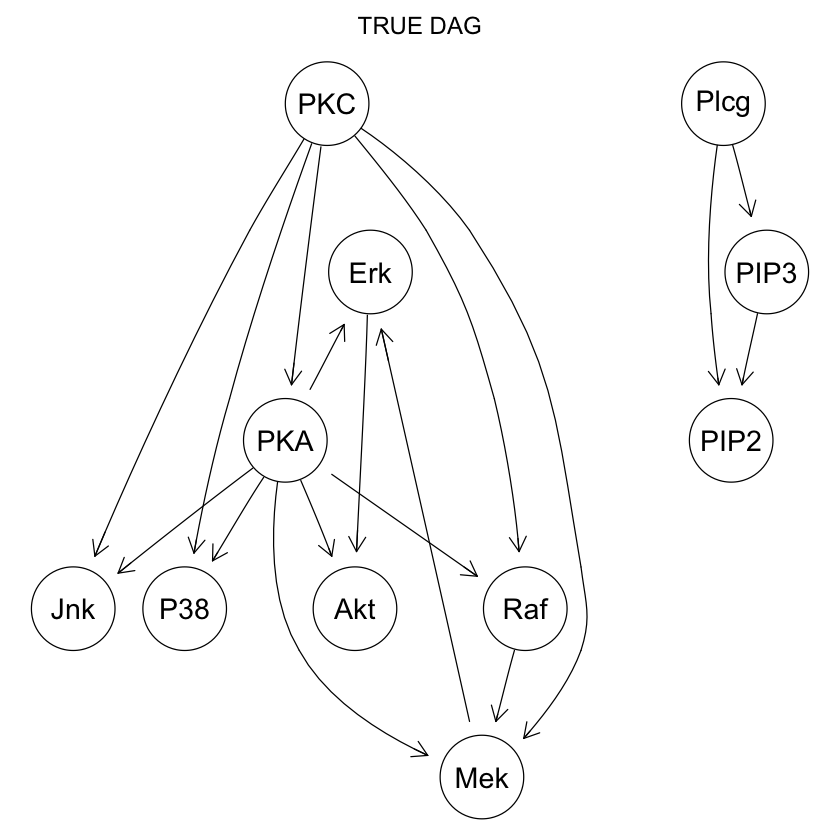

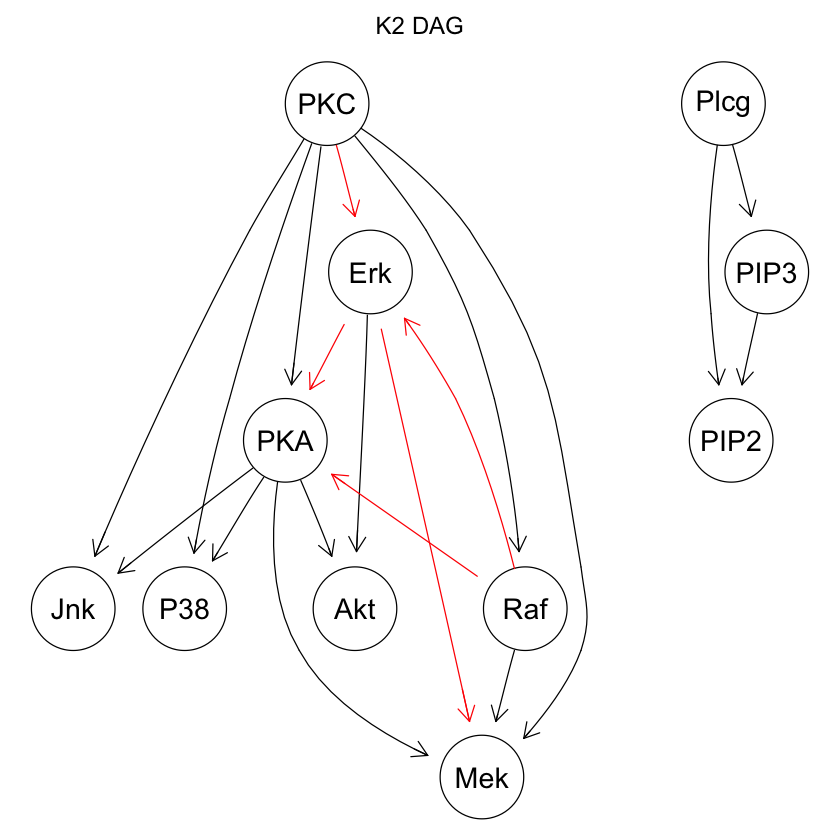

In [15]:
graphviz.compare(sachs.true.dag, sachs_net$dag, layout="dot", shape="circle", main = c("TRUE DAG", "K2 DAG"))

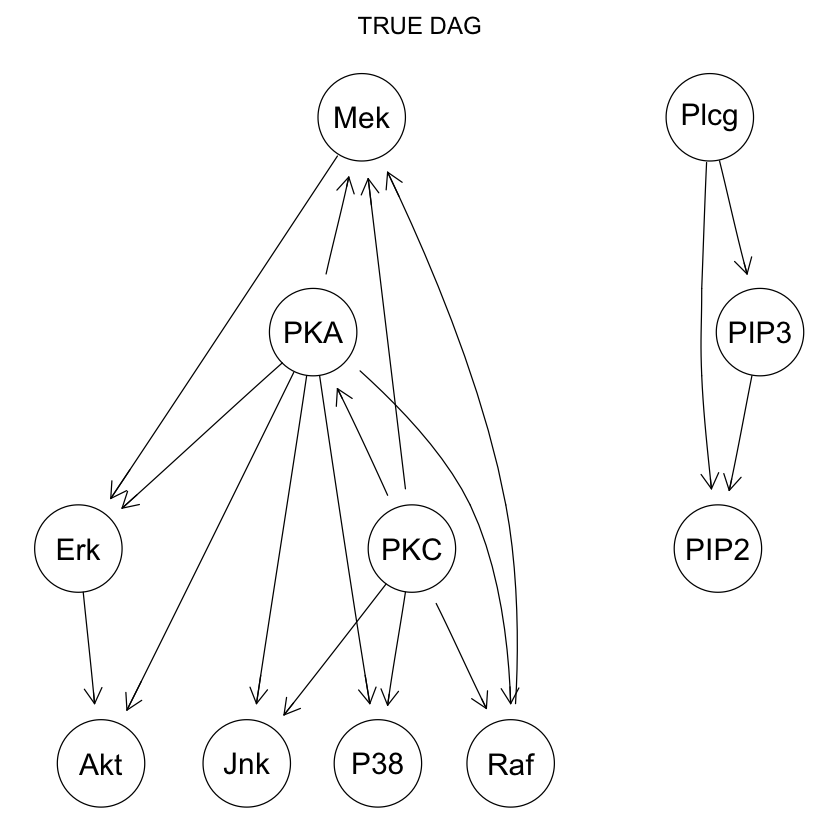

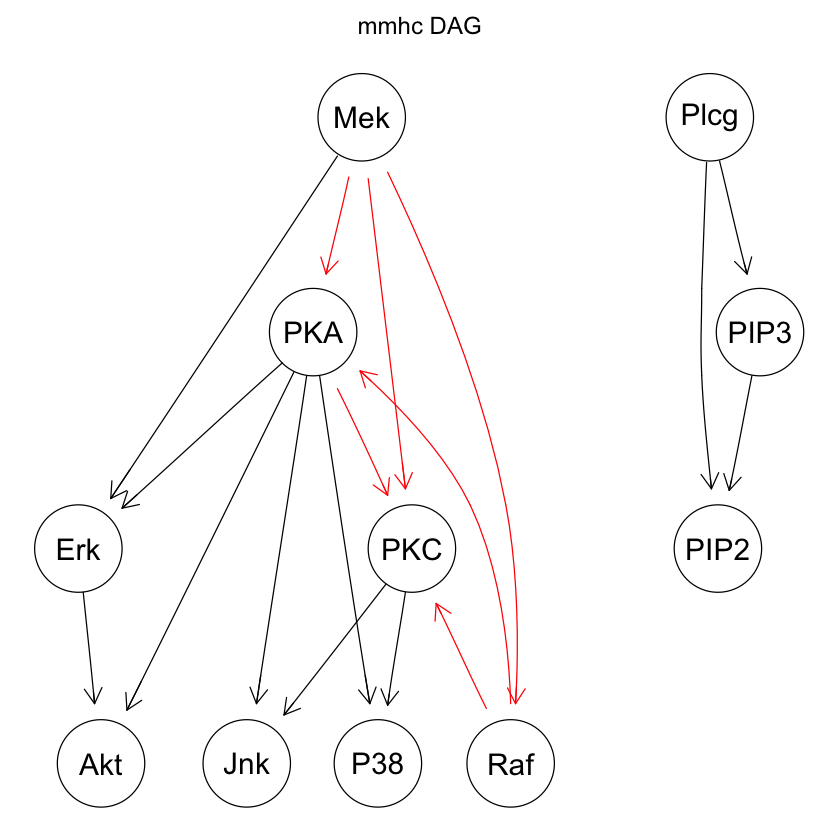

In [ ]:
graphviz.compare(sachs.true.dag, sachs_bs_bn, layout="dot", shape="circle", main = c("TRUE DAG", "MMHC DAG"))



#### Structural Hamming Distance (SHD)
The Structural Hamming Distance between two DAGs $(G_1,G_2)$ is
$$
\mathrm{SHD}(G_1,G_2)=\bigl|{(i,j):A_1(i,j)\neq A_2(i,j)}\bigr|,
$$
that is the distance, between two adjacency matrices in terms of edges, between two network structures. The lower the shd, the more similar are the two network structures.

#### Edge Counts & Precision/Recall

Let
$$
E_1,E_2
$$
be the arc‐sets.  Then:
$$
\text{TP} = |E_1\cap E_2|,\quad
\text{FP} = |E_2\setminus E_1|,\quad
\text{FN} = |E_1\setminus E_2|.
$$
+ Precision ($= \tfrac{TP}{TP+FP}$,)
+ Recall ($= \tfrac{TP}{TP+FN}$,)
+ F1 Score ($=2\frac{PR}{P+R}$).

In [ ]:
iss <- 10
bdeu.ruiz.true <- score(ruiz.true.dag, df_ruiz_fac, type = "bde", iss = iss)
bdeu.ruiz.k2 <- score(ruiz_net$dag, df_ruiz_fac, type = "bde", iss = iss)
bdeu.ruiz.bs <- score(ruiz_bs_bn, df_ruiz_fac, type = "bde", iss = iss)

data.frame("Score-BDeu" = c(bdeu.ruiz.true, bdeu.ruiz.k2, bdeu.ruiz.bs), row.names = c("True", "K2", "MMHC"))

,Score.BDeu
,<dbl>
True,-19.65341
K2,-19.65341
bnstruct,-19.65341


In [ ]:
bdeu.asia.true <- score(asia.true.dag.aligned, asia_df_fac, type = "bde", iss = iss)
bdeu.asia.k2 <- score(asia_net$dag, asia_df_fac, type = "bde", iss = iss)
bdeu.asia.bs <- score(asia_bs_bn, asia_df_fac, type = "bde", iss = iss)

data.frame("Score-BDeu" = c(bdeu.asia.true, bdeu.asia.k2, bdeu.asia.bs), row.names = c("True", "K2", "MMHC"))

,Score.BDeu
,<dbl>
True,-26093.91
K2,-22517.38
bnstruct,-24244.45


In [ ]:
bdeu.child.true <- score(child.true.dag.aligned, child_df_fac, type = "bde", iss = iss)
bdeu.child.k2 <- score(child_net$dag, child_df_fac, type = "bde", iss = iss)
bdeu.child.bs <- score(child_bs_bn, child_df_fac, type = "bde", iss = iss)

data.frame("Score-BDeu"=c(bdeu.child.true, bdeu.child.k2, bdeu.child.bs), row.names = c("True", "K2", "MMHC"))

,Score.BDeu
,<dbl>
True,-59676.08
K2,-59762.85
bnstruct,-59676.08


In [ ]:
bdeu.sachs.true <- score(sachs.true.dag, sachs_df_fac, type = "bic", iss = iss)
bdeu.sachs.k2 <- score(sachs_net$dag, sachs_df_fac, type = "bde", iss = iss)
bdeu.sachs.bs <- score(sachs_bs_bn, sachs_df_fac, type = "bde", iss = iss)

data.frame("Score-BDeu"=c(bdeu.sachs.true, bdeu.sachs.k2, bdeu.sachs.bs), row.names = c("True", "K2", "MMHC"))

Warning message in check.unused.args(extra.args, score.extra.args[[score]]):
"unused argument(s): 'iss'."


,Score.BDeu
,<dbl>
True,-72448.71
K2,-72362.69
bnstruct,-72129.58


In [ ]:
###### METRICS ######
shd_ruiz.k2  <- bnlearn::shd(ruiz_net$dag, ruiz.true.dag)
shd_ruiz.bs <- bnlearn::shd(ruiz_bs_bn, ruiz.true.dag)

shd_asia.k2  <- bnlearn::shd(asia_net$dag, asia.true.dag.aligned)
shd_asia.bs <- bnlearn::shd(asia_bs_bn, asia.true.dag.aligned)

shd_child.k2 <- bnlearn::shd(child_net$dag, child.true.dag.aligned)
shd_child.bs <- bnlearn::shd(child_bs_bn, child.true.dag.aligned)

shd_sachs.k2 <- bnlearn::shd(sachs_net$dag, sachs.true.dag)
shd_sachs.bs <- bnlearn::shd(sachs_bs_bn, sachs.true.dag)

results <- data.frame(
  Dataset = rep(c("Ruiz","Asia","Child","Sachs"), each = 2),
  Method  = rep(c("K2","MMHC"), times = 4),
  SHD     = c(
    shd_ruiz.k2,  shd_ruiz.bs,
    shd_asia.k2,  shd_asia.bs,
    shd_child.k2, shd_child.bs,
    shd_sachs.k2, shd_sachs.bs
  ),
  row.names = NULL
)
results

Dataset,Method,SHD
<chr>,<chr>,<int>
Ruiz,K2,0
Ruiz,BS,0
Asia,K2,9
Asia,BS,11
Child,K2,13
Child,BS,0
Sachs,K2,2
Sachs,BS,0


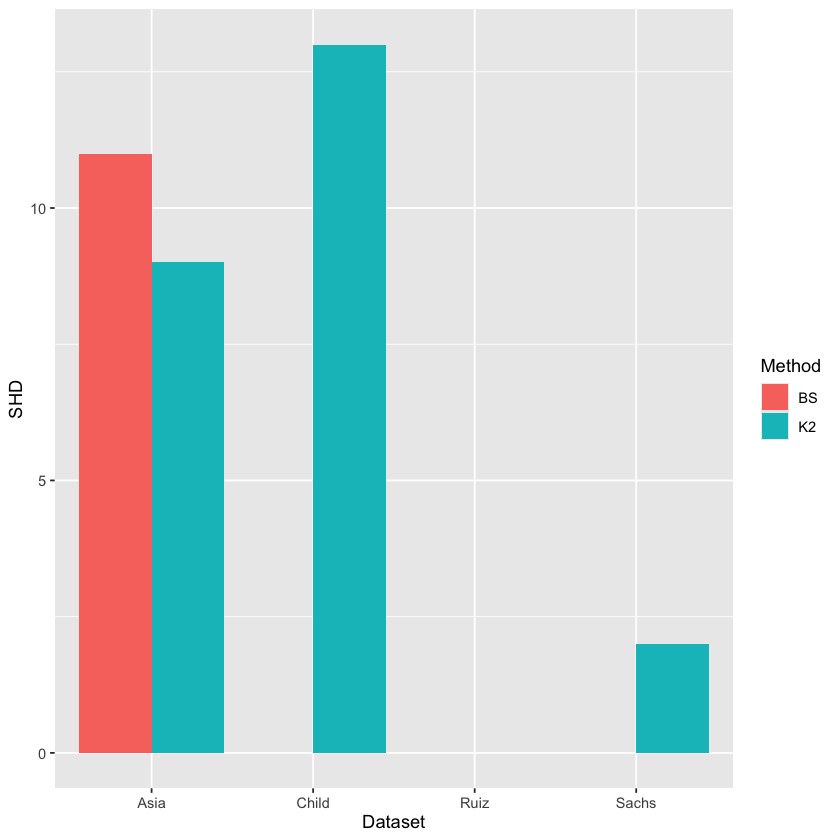

In [26]:
ggplot(results, aes(x = Dataset, y = SHD, fill = Method)) +
  geom_col(position="dodge")

In [ ]:
##### PRECISION/RECALL STATS #####
pr_ruiz.k2  <- compare_stats(ruiz.true.dag,              ruiz_net$dag)
pr_ruiz.bs  <- compare_stats(ruiz.true.dag,              ruiz_bs_bn)

pr_asia.k2  <- compare_stats(asia.true.dag.aligned,      asia_net$dag)
pr_asia.bs  <- compare_stats(asia.true.dag.aligned,      asia_bs_bn)

pr_child.k2 <- compare_stats(child.true.dag.aligned,     child_net$dag)
pr_child.bs <- compare_stats(child.true.dag.aligned,     child_bs_bn)

pr_sachs.k2 <- compare_stats(sachs.true.dag,             sachs_net$dag)
pr_sachs.bs <- compare_stats(sachs.true.dag,             sachs_bs_bn)

pr_results <- rbind(
  cbind(Dataset = "Ruiz",  Method = "K2", pr_ruiz.k2),
  cbind(Dataset = "Ruiz",  Method = "MMHC", pr_ruiz.bs),
  cbind(Dataset = "Asia",  Method = "K2", pr_asia.k2),
  cbind(Dataset = "Asia",  Method = "MMHC", pr_asia.bs),
  cbind(Dataset = "Child", Method = "K2", pr_child.k2),
  cbind(Dataset = "Child", Method = "MMHC", pr_child.bs),
  cbind(Dataset = "Sachs", Method = "K2", pr_sachs.k2),
  cbind(Dataset = "Sachs", Method = "MMHC", pr_sachs.bs)
)

float_cols <- c("Precision","Recall","F1")
pr_results[float_cols] <- lapply(pr_results[float_cols], signif, 3)

pr_results


Dataset,Method,TP,FP,FN,TN,Precision,Recall,F1
<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Ruiz,K2,2,0,0,7,1.000,1.000,1.000
Ruiz,BS,0,2,2,5,0.000,0.000,NA
Asia,K2,1,9,7,47,0.100,0.125,0.111
Asia,BS,2,5,6,51,0.286,0.250,0.267
Child,K2,3,23,22,352,0.115,0.120,0.118
Child,BS,2,23,23,352,0.080,0.080,0.080
Sachs,K2,0,19,17,85,0.000,0.000,NA
Sachs,BS,2,15,15,89,0.118,0.118,0.118
